Index Price Prediction based on interest and unemployment rates

The index price refers to the value of a stock market index, such as the S&P 500 or Dow Jones Industrial Average, which represents the performance of a group of selected stocks. This price is influenced by various economic indicators, including interest rates and unemployment rates. 

Interest rates affect the cost of borrowing and can influence corporate profits, investment decisions, and consumer spending, all of which impact stock prices. Unemployment rates reflect the health of the labor market; higher unemployment can signal economic weakness, potentially leading to lower corporate earnings and reduced investor confidence. By analyzing these features, we can attempt to predict movements in the index price and gain insights into broader market trends.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('economic_index.csv')
print(df.head())

   Unnamed: 0  year  month  interest_rate  unemployment_rate  index_price
0           0  2017     12           2.75                5.3         1464
1           1  2017     11           2.50                5.3         1394
2           2  2017     10           2.50                5.3         1357
3           3  2017      9           2.50                5.3         1293
4           4  2017      8           2.50                5.4         1256


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB
None


In [10]:
print(df.columns.tolist())


['Unnamed: 0', 'interest_rate', 'unemployment_rate', 'index_price']


In [19]:
#drop unnessesary columns
df.drop(columns=['year', 'month','Unnamed: 0'], axis=1, inplace=True, errors='ignore')
# print(df.head())
df


,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [20]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

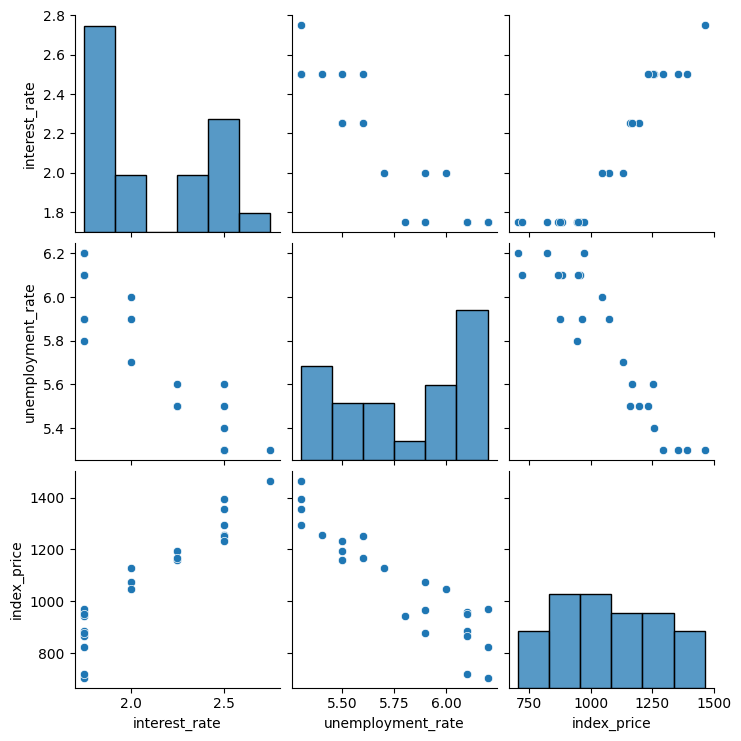

In [21]:
## Visualising the data

sns.pairplot(df)

In [22]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


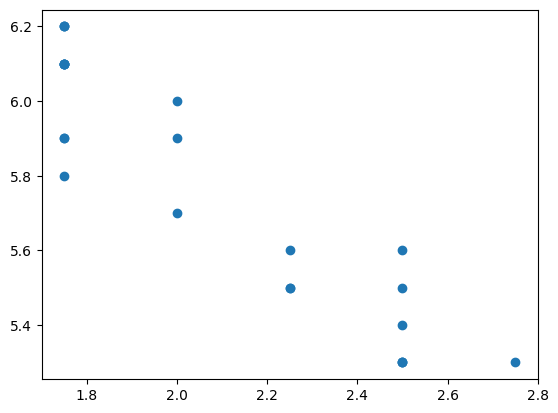

In [ ]:
#visualising datapoints more clearly

plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.xlabel('Interest rate')
plt.ylabel('Unemployment rate')

In [25]:
#extracting dependent and independent variables

X=df[['interest_rate','unemployment_rate']]
Y=df['index_price']
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [34]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


<Axes: xlabel='interest_rate', ylabel='index_price'>

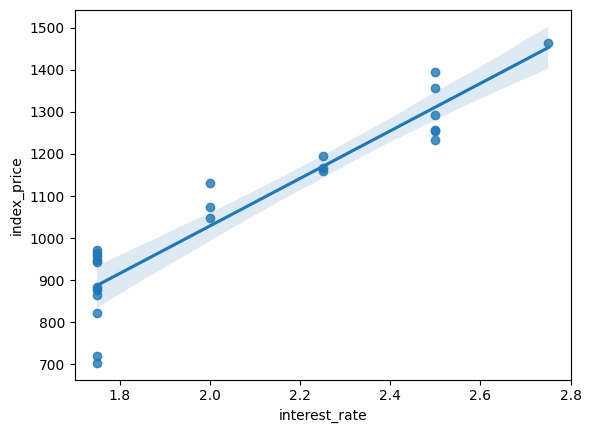

In [30]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])


<Axes: xlabel='unemployment_rate', ylabel='index_price'>

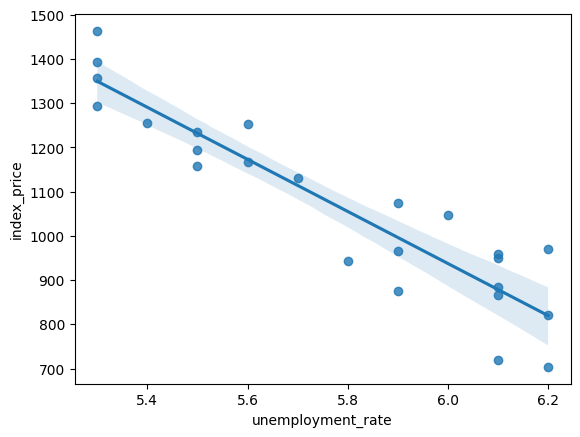

In [31]:
sns.regplot(x=df['unemployment_rate'], y=df['index_price'])


In [35]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [37]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()

regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
print("Intercept (b₀):", regression.intercept_)
print("Coefficients (b₁, b₂):", regression.coef_)


Intercept (b₀): 1059.4210526315792
Coefficients (b₁, b₂): [  86.63351334 -114.04857249]


In [41]:
y_pred = regression.predict(X_test)


In [45]:
from sklearn.metrics import r2_score,mean_squared_error 
r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.2f}")


R² Score: 0.851
MSE: 5952.21


In [48]:
# Input: Interest Rate = 2.75, Unemployment Rate = 5.1
custom_input = np.array([[2.75, 5.1]])
predicted_index_price = regression.predict(custom_input)

print(f"Predicted Index Price: {predicted_index_price[0]:.2f}")

actual_price=df[df['interest_rate']==2.75]['index_price'].values[0]
error=actual_price-predicted_index_price[0]
print(error)


Predicted Index Price: 716.02
747.9845053614104
